In [37]:
! git clone https://github.com/qmlcode/tutorial.git

fatal: destination path 'tutorial' already exists and is not an empty directory.
/bin/bash: line 0: cd: /content/tutorial: No such file or directory


In [17]:
%config IPCompleter.greedy=True

In [2]:
%cd tutorial
! ls

[Errno 2] No such file or directory: 'tutorial'
/home/jan/projects/qmlnet/tutorial
exercise_2_1.py  exercise_2_4.py  modelnew.h5  QML_Tutorial.ipynb
exercise_2_2.py  hof_qm7.txt	  __pycache__  QML_Tutorial_sklearn.ipynb
exercise_2_3.py  LICENSE	  qm7	       tutorial_data.py


In [3]:
#!/usr/bin/env python
from __future__ import print_function
import numpy as np

import qml
from qml.kernels import gaussian_kernel
from qml.math import cho_solve

from tutorial_data import compounds
from tutorial_data import energy_pbe0
from tutorial_data import energy_delta

if __name__ == "__main__":

    # For every compound generate a coulomb matrix
    for mol in compounds:

        mol.generate_coulomb_matrix(size=23, sorting="row-norm")
        # mol.generate_bob(size=23, asize={"O":3, "C":7, "N":3, "H":16, "S":1})
            

    # Make a big 2D array with all the 
    X = np.array([mol.representation for mol in compounds], dtype=np.float32)
    energy_pbe0 = np.array(energy_pbe0,  dtype=np.float32)
    # X = np.array([mol.bob for mol in compounds])

    print(energy_pbe0)

    # Assign 1000 first molecules to the training set
    X_training = X[:1000]
    Y_training = energy_pbe0[:1000]

    # Y_training = energy_delta[:1000]

    # Assign 1000 first molecules to the training set
    X_test = X[-1000:]
    Y_test = energy_pbe0[-1000:]
    # Y_test = energy_delta[-1000:]
   
    # Calculate the Gaussian kernel
    sigma = 100 #700.0
    K = gaussian_kernel(X_training, X_training, sigma)
    print(K)

    # Add a small lambda to the diagonal of the kernel matrix
    K[np.diag_indices_from(K)] += 1e-8

    # Use the built-in Cholesky-decomposition to solve
    alpha = cho_solve(K, Y_training) 

    #print(alpha)

    # Assign 1000 last molecules to the test set
    X_test = X[-1000:]
    Y_test = energy_pbe0[-1000:]

    # calculate a kernel matrix between test and training data, using the same sigma
    Ks = gaussian_kernel(X_test, X_training, sigma)

    # Make the predictions
    Y_predicted = np.dot(Ks, alpha)

    # Calculate mean-absolute-error (MAE):
    print(np.mean(np.abs(Y_predicted - Y_test)))


[-1633.28 -1212.67 -1531.73 ... -1728.7  -1506.76 -1866.88]
[[1.         0.8152882  0.87350271 ... 0.90991951 0.82913994 0.77672171]
 [0.8152882  1.         0.81460855 ... 0.84226491 0.97323939 0.78838225]
 [0.87350271 0.81460855 1.         ... 0.8913725  0.83339596 0.78083487]
 ...
 [0.90991951 0.84226491 0.8913725  ... 1.         0.86685092 0.88326791]
 [0.82913994 0.97323939 0.83339596 ... 0.86685092 1.         0.80932061]
 [0.77672171 0.78838225 0.78083487 ... 0.88326791 0.80932061 1.        ]]
15.00718369095469


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Rep (Dense)            (None, 276)               76452     
_________________________________________________________________
dense_3 (Dense)              (None, 10000)             2770000   
_________________________________________________________________
dense_4 (Dense)              (None, 4000)              40004000  
_________________________________________________________________
dense_5 (Dense)              (None, 4000)              16004000  
_________________________________________________________________
HL_1 (Dense)                 (None, 1500)              6001500   
_________________________________________________________________
HL_2 (Dense)                 (None, 1500)              2251500   
______________________________

15.637714

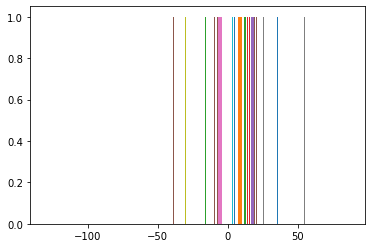

In [5]:
%load_ext tensorboard


import datetime
from datetime import datetime
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.layers import (Input, Convolution1D, Dense, MaxPooling1D,
                                    Flatten, Dropout, Activation, average,
                                    BatchNormalization)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer





exponential_layer = keras.layers.Lambda(lambda x: tf.exp(-x**2.0))

logdir = "logs3/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model = Sequential()
model.add(Dense(276, input_dim=276, kernel_initializer='normal', activation='linear', name='Input_Rep'))
#model.add(exponential_layer)
model.add(Dense(10000, kernel_initializer='he_normal', activation='elu'))
Dropout(rate=0.8)
model.add(Dense(4000, kernel_initializer='he_normal', activation='elu'))
Dropout(rate=0.5)
model.add(Dense(4000, kernel_initializer='he_normal', activation='elu'))
Dropout(rate=0.5)
model.add(Dense(1500, kernel_initializer='he_normal', activation='elu', name='HL_1'))
Dropout(rate=0.4)
model.add(Dense(1500, kernel_initializer='he_normal', activation='elu', name='HL_2'))
Dropout(rate=0.3)
model.add(Dense(1500, kernel_initializer='he_normal', activation='elu', name='HL_3'))
Dropout(rate=0.2)
model.add(Dense(1500, kernel_initializer='he_normal', activation='elu', name='HL_4'))
Dropout(rate=0.1)
model.add(Dense(1500, kernel_initializer='he_normal', activation='elu', name='HL_5'))
Dropout(rate=0.1)
model.add(Dense(1500, kernel_initializer='he_normal', activation='elu', name='HL_6'))
Dropout(rate=0.1)
model.add(Dense(1500, kernel_initializer='he_normal', activation='elu', name='HL_7'))



model.add(Dense(1, activation='linear', name='Output_Energy'))
#opt = Adam(lr=0.01, decay=1e-6)
opt = Adam(lr=0.00005, decay=1e-5) #, decay=9e-4)
#opt = SGD(lr=0.0001, momentum = 0.9, nesterov=True) #, decay=9e-4)
model.compile(loss='mae', optimizer=opt)
model.summary()

new_fit = True

transform = True
if transform:
  scaler = QuantileTransformer()
  X_training  = tf.convert_to_tensor(scaler.fit_transform(X_training))
  X_test      = tf.convert_to_tensor(scaler.transform(X_test))

  Y_training = tf.convert_to_tensor(Y_training)
  Y_test = tf.convert_to_tensor(Y_test)


if new_fit:
  checkpoint_cb  = keras.callbacks.ModelCheckpoint("modelnew.h5", save_best_only=True)
  history   = model.fit(X_training, Y_training, validation_data=(X_test, Y_test),batch_size=50, epochs=2000,callbacks=[ checkpoint_cb],verbose=1)

else:
  model = keras.models.load_model('modelnew.h5')  


best = model #rnd_search_cv.best_estimator_
pred = best.predict(X_test)
pred = pred.flatten()
import matplotlib.pyplot as plt

#plt.plot(pred, Y_test, "+")
plt.hist(np.abs(pred - np.array(Y_test)))
plt.show()
np.mean(np.abs(pred - Y_test))  



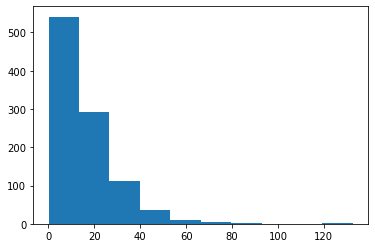

15.637714

In [16]:
best = model #rnd_search_cv.best_estimator_
pred = best.predict(X_test)
pred = pred.flatten()
import matplotlib.pyplot as plt

#plt.plot(pred, Y_test, "+")
plt.hist(np.abs(pred - np.array(Y_test)))
plt.show()
np.mean(np.abs(pred - Y_test))  

In [31]:
import tqdm

mc_predictions = []
for i in tqdm.tqdm(range(1000)):
    y_p = best(X_test, training=True)
    mc_predictions.append(y_p)
    
mc_predictions = np.array(mc_predictions)

100%|██████████| 1000/1000 [00:59<00:00, 16.70it/s]


In [32]:
mc_predictions.shape

(1000, 1000, 1)

In [33]:
mc_ensemble_pred = np.array(mc_predictions).mean(axis=0)

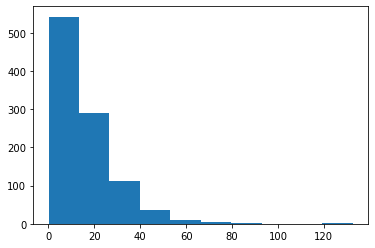

15.637552

In [34]:
mc_ensemble_pred


plt.hist(np.abs(mc_ensemble_pred.flatten() - np.array(Y_test)))
plt.show()
np.mean(np.abs(mc_ensemble_pred.flatten() - Y_test))  